# Lab-based Group Assignment 3:
## Signature Authentication to Prevent Fraud Transactions in Business



![Imgur](https://i.imgur.com/r1U9dHD.png)

### **Business Problem**
In a legal context, a signature is your name written in a distinct, personalized form as a way of identifying yourself to authorize a document. Using signiture for identity validation is still a global-wide practice for legal authentication.

In order to **prevent fraud transactions, a bank’s established practice** is to compare the signature on a request to the signature maintained in the bank’s file system and to confirm that the request is issued by the correct issuer.

Without modern signiture authentication technology, banks around the world had suffered huge losses against fraud transaction in which  signitures are maliciously forged.
\
\
(Optional) Read More about a real-life signiture-related legal case:  
<a href="http://www.joneslemongraham.com/blog/banks-loss-a-covered-forgery-under-insuring-agreement-d-of-financial-institution-bond-and-not-excluded-by-loan-loss-exclusion/#.X2bDBy9h1PM">Bank of Ann Arbor v. Everest National Insurance Company, Case No. 12-11251 (E.D. Mi. Feb. 25, 2013)</a>
\
\
Luckily, we have advanced computer vision technology, which can conveniently and accurately identify forged signitures.


![Imgur](https://i.imgur.com/f9Ozq9M.png)

<img src="https://storage.googleapis.com/kaggle-datasets-images/107946/257611/57ea0c6f63a05a981b18eb7ad5547464/dataset-cover.png?t=2019-01-20-18-39-59">

### **Task**
Build a deep learning model to classify forged signatures from genuine signitures to prevent fraud transactions in businesses.

---

In [ ]:
# First things first: Please select a GPU backend.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
Click the folder button on the left, and Colab will display a file window. (Probably you might have to wait for at most 10 seconds, before the `drive` folder shows up.) Find the zip file `signature-verification-dataset.zip` under the drive folder.  

Right click the file and select "copy path". Now the file path is on your clip board. Paste the path inside the double quote in the next code chunk.

## Q1: Please unzip, read and seperate the dataset for the model?

In [3]:
# Unzip signature-verification-dataset.zip to "/content" directory.
!unzip -q "/content/drive/MyDrive/Deep Learning/signature-verification-dataset" -d /content/

In [4]:
import pandas as pd
# Load data
X="file_name"
Y="forged"
train_df=pd.read_csv("/content/sign_data/train_data.csv",header=None,usecols=[1,2],names=[X,Y],dtype=str)
test_df=pd.read_csv("/content/sign_data/test_data.csv",header=None,usecols=[1,2],names=[X,Y],dtype=str)

# Train Test Split
from sklearn.model_selection import train_test_split
validation_df,test_df=train_test_split(test_df,test_size=0.5)
print(train_df.shape,validation_df.shape,test_df.shape)

(23206, 2) (2874, 2) (2874, 2)


In [5]:
display(train_df)
# See how many genuine/forged signitures in train data?
train_df.forged.value_counts()

,file_name,forged
0,068_forg/03_0113068.PNG,1
1,068_forg/01_0124068.PNG,1
2,068_forg/02_0124068.PNG,1
3,068_forg/01_0113068.PNG,1
4,068_forg/04_0124068.PNG,1
...,...,...
23201,031/03_031.png,0
23202,031/12_031.png,0
23203,031/11_031.png,0
23204,031/06_031.png,0


,count
forged,
0,12602
1,10604


In [6]:
# Define the data path, we will use it later.
path="/content/sign_data/"

In [7]:
# The mode of image
from PIL import Image
Image.open("/content/sign_data/train/001/001_01.PNG").mode

'RGB'

## Q2: Please generate new dataset by using ImageDataGenerator
-think about why the "rescale" parameter in ImageDataGenerator() is set to 1./255

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Instantiate ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale=1./255)

# Configure train data generator
train_gen=train_datagen.flow_from_dataframe(
    train_df,                                   # Pandas dataframe containing the filepaths relative to directory (or absolute paths if directory is None) of the images in a string column.
    directory="/content/sign_data/train",       # string, path to the directory to read images from. If None, data in x_col column should be absolute paths.
    x_col="file_name",                          # string, column in dataframe that contains the filenames (or absolute paths if directory is None).
    y_col='forged',                             # string or list, column/s in dataframe that has the target data.
    target_size=(128, 256),                     # tuple of integers (height, width), default: (256, 256). The dimensions to which all images found will be resized.
    color_mode="rgb",                           # one of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1 or 3 color channels.
    class_mode="binary",                        # one of "binary", "categorical", "input", "multi_output", "raw", sparse" or None. Default: "categorical". If y_col is a binary class (0 or 1), you should use "binary". If y_col is numeric value array, you should use "raw".
    batch_size=32,   # size of the batches of data (default: 32). This batchsize is different from the one in model.fit(). It is just another batchsize served for converting original images to executable format for neural network.
    shuffle=True)                               # whether to shuffle the data (default: True). This is for eliminating bias in generating input data

# Configure validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_gen=val_datagen.flow_from_dataframe(
    validation_df,
    directory="/content/sign_data/train",
    x_col="file_name",
    y_col="forged",
    target_size=(128, 256),
    color_mode="rgb",                           # one of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1 or 3 color channels.
    class_mode="binary",
    ) #In the generation of validation and test dataset, its not necessary to define batchsize and shuffle. Because only training dataset is taken for training.

# Configure test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen=test_datagen.flow_from_dataframe(
    test_df,
    directory="/content/sign_data/test",
    x_col="file_name",
    y_col="forged",
    target_size=(128, 256),
    color_mode="rgb",                           # one of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1 or 3 color channels.
    class_mode="binary",
    )

Found 23206 validated image filenames belonging to 2 classes.
Found 2874 validated image filenames belonging to 2 classes.
Found 2874 validated image filenames belonging to 2 classes.


## Q3: Please use dense neural networks for predict the forged signatures.

In [16]:
# Build sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
model=Sequential()
model.add(Flatten())   # Flatten the channels into one single long array
model.add(Dense(256 ,input_shape = (128*256*3,) ,activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",                   #computes the cross-entropy loss between true labels and predicted labels
              optimizer="adam",
              metrics=['accuracy'])

history=model.fit(train_gen,                                # Train data generator
      steps_per_epoch= 50,    #train_gen.n//train_gen.batch_size. In lab 2, we set "batchsize" in model.fit() to determine the step length for steps in one epoch.
                  #Steps_per_epoch is the number of steps in one epoch. It can also determine the step length (batchszie) in each epoch. So, we can set steps_per_epoch instead to replace "batchsize".
                  #Either batchsize or steps_per_epoch is fine. Just make sure you set one of them.
      epochs= 50,
      validation_data=val_gen,                              # Validation data generator
      validation_steps=50)       # val_gen.n//val_gen.batch_size, Need to sepcify this parameter.        "//" means get the integer part from division result.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - accuracy: 0.5060 - loss: 41.7874 - val_accuracy: 0.5169 - val_loss: 13.5148
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.4965 - loss: 5.7003 - val_accuracy: 0.4772 - val_loss: 14.4240
Epoch 3/50
 5/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3900 - loss: 12.8257

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 239ms/step - accuracy: 0.4865 - loss: 7.7868 - val_accuracy: 0.4888 - val_loss: 0.9661
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - accuracy: 0.5192 - loss: 4.8720 - val_accuracy: 0.4623 - val_loss: 1.2187
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 293ms/step - accuracy: 0.5146 - loss: 3.5849 - val_accuracy: 0.5175 - val_loss: 1.1860
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.5640 - loss: 0.8984 - val_accuracy: 0.4906 - val_loss: 0.9382
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.5435 - loss: 0.9196 - val_accuracy: 0.5925 - val_loss: 0.6295
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.5429 - loss: 1.0805 - val_accuracy: 0.5691 - val_loss: 0.6447
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.5798 - loss: 0.7643 - val_accuracy: 0.5931 - val_loss: 0.6202
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.6253 - loss: 0.7171 - val_accuracy: 0.487

Evaluate the accruacy of the result. Why do we have the low accuracy of the result?

The training accuracy is low, which indicates there might be underfitting. And the reason may be images need a more complex model to analyze.

## Q4: Please use CNNs to predict the forged signatures with high accuracy.

### Larger Convolution Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback

# Build sequential model
model=Sequential()
model.add(Conv2D(32, 3,input_shape=(128,256,3),activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dropout(0.5))                                                         # Add Dropout layer, randomly drops 50% neurons from propagation.
model.add(Dense(128,activation="relu", kernel_regularizer="l2"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

# Configure EarlyStopping object
Es=EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)      # EarlyStopping with patience 2: if in 2 consecutive epochs, the validation loss didn't hit the record, training will stop.

# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch=50, #train_gen.n//train_gen.batch_size. In lab 2, we set "batchsize" in model.fit() to determine the step length for steps in one epoch.
                  #Steps_per_epoch is the number of steps in one epoch. It can also determine the step length (batchszie) in each epoch. So, we can set steps_per_epoch instead to replace "batchsize".
                  #Either batchsize or steps_per_epoch is fine. Just make sure you set one of them.
      epochs=50,
      validation_data=val_gen,
      validation_steps=50, #val_gen.n//val_gen.batch_size
      callbacks=[Es])                                                           # Here is how we use EarlyStopping

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 282ms/step - accuracy: 0.5497 - loss: 2.9301 - val_accuracy: 0.9362 - val_loss: 1.0428
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.8252 - loss: 0.9135 - val_accuracy: 0.9443 - val_loss: 0.5623
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.8968 - loss: 0.6434 - val_accuracy: 0.7900 - val_loss: 0.5915
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 273ms/step - accuracy: 0.9033 - loss: 0.4559 - val_accuracy: 0.9294 - val_loss: 0.3272
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - accuracy: 0.9330 - loss: 0.3763 - val_accuracy: 0.9356 - val_loss: 0.3122
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 277ms/step - accuracy: 0.9478 - loss: 0.3423 - val_accuracy: 0.9788 - val_loss: 0.2533
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step - accuracy: 0.9659 - loss: 0.2874 - val_accuracy: 0.9631 - val_loss: 0.2760
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.9491 - loss: 0.3288 - val_accu

In [19]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 127, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 125, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 119040)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 119040)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │      15,237,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,776,165 (174.62 MB)

 Trainable params: 15,258,721 (58.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,517,444 (116.41 MB)

What can we learn from the model summary?

There are convolutional layers, max-pooling layers, flattening, dropout, and dense (fully connected) layers.

The summary also shows how the shape of the data changes as it passes through each layer. For example, the input shape of the first convolutional layer is (128, 256, 3), which is an RGB image of size 128x256.

The flatten layer's output shape is (None, 119040), which means that all features are collapsed into a single vector.

"dense_21" has 15M parameters, indicating the model is complex, which increases the risk of overfitting. We should put more regularization and additional convolutional layers to avoid overfitting.

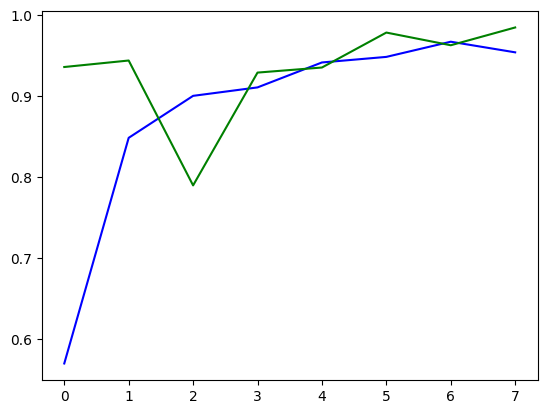

In [20]:
# Plot history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='g')
plt.show()

In [21]:
# Evaluate test data accuracy.
model.evaluate(test_gen, steps=test_gen.n // test_gen.batch_size)

89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9674 - loss: 0.2751


[0.2669370472431183, 0.9701545238494873]

### Underfitting and Overfitting

![Imgur](https://i.imgur.com/pQedNv0.png)

### Convolution Model

In [24]:
# Final version
# Build sequential model
model=Sequential()
model.add(Conv2D(32, 3,input_shape=(128,256,3),activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3,activation="relu"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dropout(0.5))                                                         # Add Dropout layer, randomly drops 50% neurons from propagation.
model.add(Dense(128,activation="relu", kernel_regularizer="l2"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

# Configure EarlyStopping object
Es=EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True)      # EarlyStopping with patience 2: if in 2 consecutive epochs, the validation loss didn't hit the record, training will stop.

# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch=50, #train_gen.n//train_gen.batch_size
      epochs=50,
      validation_data=val_gen,
      validation_steps=50, #val_gen.n//val_gen.batch_size
      callbacks=[Es])                                                           # Here is how we use EarlyStopping

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 298ms/step - accuracy: 0.5148 - loss: 3.2444 - val_accuracy: 0.5487 - val_loss: 1.5377
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 300ms/step - accuracy: 0.7839 - loss: 1.2171 - val_accuracy: 0.9325 - val_loss: 0.9189
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - accuracy: 0.8634 - loss: 0.8402 - val_accuracy: 0.9519 - val_loss: 0.6556
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - accuracy: 0.8848 - loss: 0.6493 - val_accuracy: 0.9521 - val_loss: 0.4543
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.9337 - loss: 0.4844 - val_accuracy: 0.9569 - val_loss: 0.3541
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.9161 - loss: 0.3923 - val_accuracy: 0.9647 - val_loss: 0.3457
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - accuracy: 0.9500 - loss: 0.3592 - val_accuracy: 0.9419 - val_loss: 0.4470
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.9453 - loss: 0.3888 - val_accu

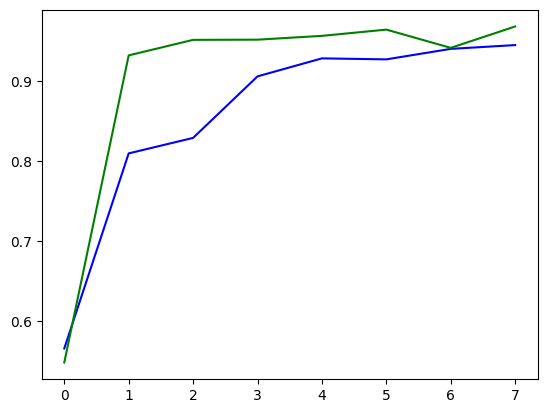

In [25]:
# Plot history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='g')
plt.show()

This simple convolution model's performance is similar to dense model.

###This basic convolution Model

In [9]:
# Intermediate version
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback

model=Sequential()
model.add(Conv2D(32, 3,input_shape=(128, 256,3),activation="relu"))     # The first convolution layer: 16 filters with size 3x3.
model.add(MaxPooling2D(2))                                              # Pooling: MaxPooling
model.add(Flatten())                                                    # Flatten the output of pooling layer i.e. create a long array
model.add(Dense(128,activation="relu", kernel_regularizer="l2"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",                               # This is binary classification
              optimizer="adam",
              metrics=['accuracy'])                                        # Monitoring the accuracy

# Fit the model and record the training history for plotting purpose
history=model.fit(train_gen,
      steps_per_epoch=50, #train_gen.n//train_gen.batch_size
      epochs=50,
      validation_data=val_gen,
      validation_steps=50) #val_gen.n//val_gen.batch_size

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 245ms/step - accuracy: 0.5214 - loss: 14.1659 - val_accuracy: 0.7950 - val_loss: 1.9986
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7995 - loss: 1.7627

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 303ms/step - accuracy: 0.7995 - loss: 1.7589 - val_accuracy: 0.8234 - val_loss: 1.2397
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 258ms/step - accuracy: 0.8196 - loss: 1.1772 - val_accuracy: 0.8550 - val_loss: 0.9471
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.8308 - loss: 0.9242 - val_accuracy: 0.8571 - val_loss: 0.7767
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - accuracy: 0.8705 - loss: 0.7510 - val_accuracy: 0.8138 - val_loss: 0.7537
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.9134 - loss: 0.6312 - val_accuracy: 0.9113 - val_loss: 0.5568
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.8888 - loss: 0.6236 - val_accuracy: 0.8994 - val_loss: 0.5356
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.9319 - loss: 0.4850 - val_accuracy: 0.9466 - val_loss: 0.4542
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.9394 - loss: 0.4576 - val_accuracy: 0.8925 

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 127, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      32,772,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,325,605 (375.08 MB)

 Trainable params: 32,775,201 (125.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,550,404 (250.05 MB)

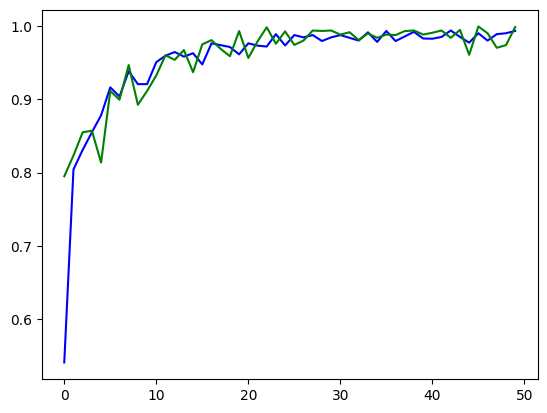

In [11]:
# Plot history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='g')
plt.show()

In [12]:
model.evaluate(test_gen)

90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9977 - loss: 0.1834


[0.18255791068077087, 0.9979122877120972]

In [13]:
model.save('/content/?.h5')
model.save('/content/?.h5')
model.save('content/basic_cnn_model.h5')

At the end, please make sure that you explain how to optimized the parameters and we solved the problem.

If you have any questions, please contact me by using salihtutun@wustl.edu.

Salih Tutun, Ph.D.